In [ ]:
"""

Make sure to download the vis_utils.py file from my repo:

https://github.com/kevinzakka/blog-code/blob/master/new-mnist-experiment/vis_utils.py

"""

In [66]:
import os
import time
import struct
import fnmatch
import numpy as np

from vis_utils import *

# plotting params
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

### Load the Data

In [67]:
def read_idx(filename):
    """
    Borrowed from Tyler Neylon
    
    https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [68]:
# path params
data_dir = './data/'
pattern = '*ubyte'

# crawl directory and grab filenames
names = []
for path, subdirs, files in os.walk(data_dir):
    for filename in files:
        if fnmatch.fnmatch(filename, pattern):
            names.append(os.path.join(path, filename))
            
num_files = len(names)
for i in range(len(names)):
    print("{}".format(names[i]))
    
print("\nThere are {} files.".format(num_files))

./data/t10k-images-idx3-ubyte
./data/t10k-labels-idx1-ubyte
./data/train-images-idx3-ubyte
./data/train-labels-idx1-ubyte

There are 4 files.


In [69]:
# read the files into a numpy array
data = {}
for i in range(num_files):
    if 'train' in names[i]:
        if 'images' in names[i]:
            data['train_imgs'] = read_idx(names[i]) 
        else:
            data['train_labels'] = read_idx(names[i])
    else:
        if 'images' in names[i]:
            data['test_imgs'] = read_idx(names[i])
        else:
            data['test_labels'] = read_idx(names[i])

### View A Sample 20x20 Grid

In [70]:
# choose training set
X = data['train_imgs']
y = data['train_labels']

# dimension sanity check
print("X: {}".format(X.shape))
print("y: {}".format(y.shape))

X: (60000, 28, 28)
y: (60000,)


In [71]:
# shuffle dataset
p = np.random.permutation(len(X))
X = X[p]
y = y[p]

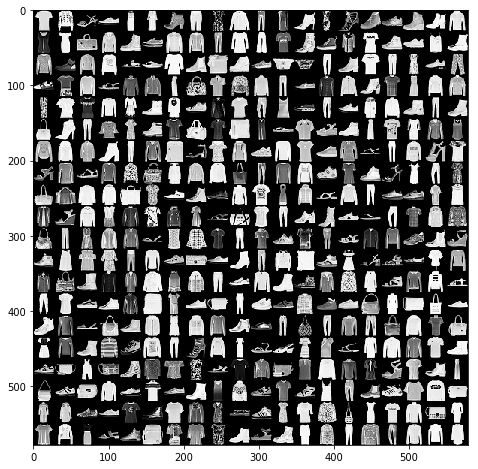

In [72]:
mask = np.arange(400)
X_sample = X[mask]
y_sample = y[mask]

view_images(X_sample)

### View 9x9 Grid with Labels

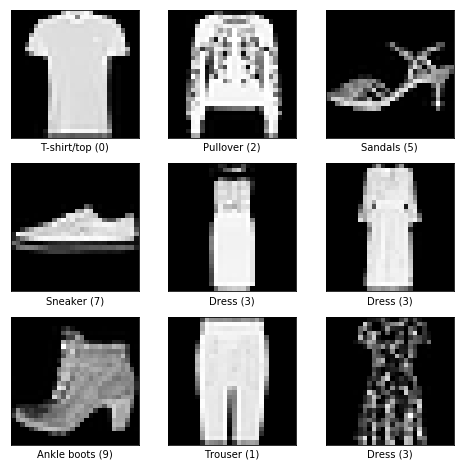

In [73]:
# sample 9 images
mask = np.arange(9)
X_sample = X[mask]
y_sample = y[mask]

plot_9by9(X_sample, y_sample)

### Make It A Pytorch DataLoader

In [77]:
import torch

In [78]:
X_train = data['train_imgs']
X_test = data['test_imgs']
y_train = data['train_labels']
y_test = data['test_labels']

X_train = np.expand_dims(X_train, axis=1).astype('float32')
X_test = np.expand_dims(X_test, axis=1).astype('float32')

# normalize
X_train /= 255.0
X_test /= 255.0

In [79]:
# transform to torch tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

# create custom dataloaders
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

# increase num_workers and set pin_memory to false if using cpu
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=64, 
                                           shuffle=True,
                                           num_workers=1,
                                           pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=64, 
                                           shuffle=True,
                                           num_workers=1,
                                           pin_memory=True)

In [ ]:
for i, (data, target) in enumerate(train_loader):
    # ...